In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sp
from scipy.optimize import minimize

In [3]:
#P1 load data
dark1 = np.load('dark1.npy')
dark2 = np.load('dark2.npy')
darktrue = np.load('darktrue.npy')

temp1 = np.load('temp1.npy')
print(temp1)
temp2 = np.load('temp2.npy')
temptrue = np.load('temptrue.npy')

[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]


In [65]:
x = np.array([1,1,1])
y= np.array([2,3,4])
print(x*y)

[2 3 4]


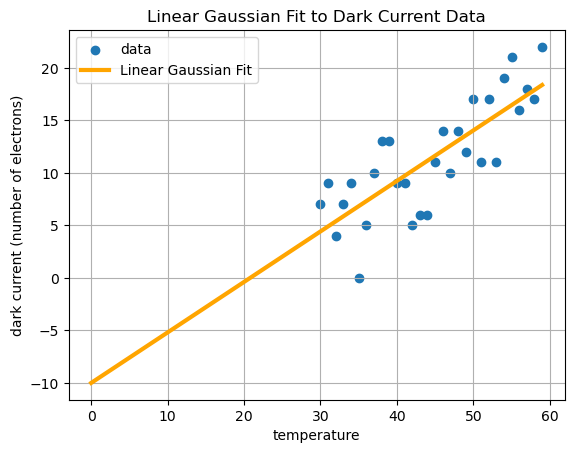

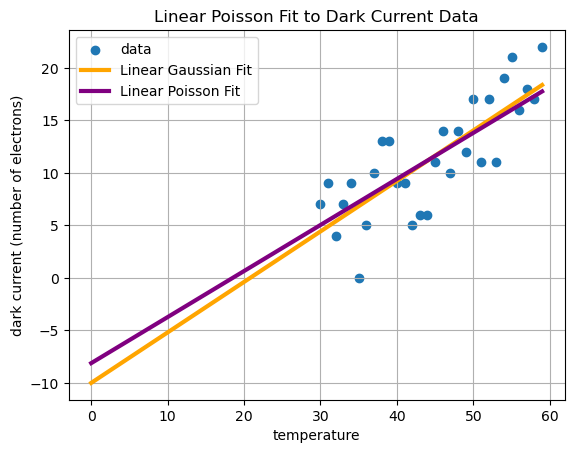

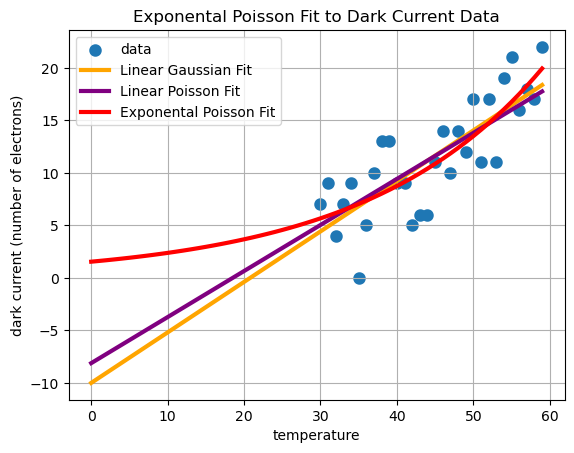

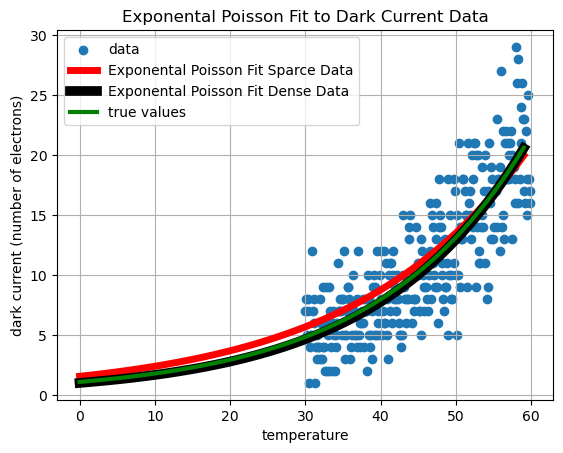

In [121]:
def ident(x):
    return x

def exp_func(x):
    return(np.e**x)
def linear_Model(params,x):
    return np.clip(params[0] + params[1]*x, 1e-8, None)
def linear_Model2(params,x):
    return params[0] + params[1]*x
def exp_Model(params,x):
    return np.exp(params[0] + params[1]*x)


def Linear_Gauss_obj_funct(params,y,x):
    return np.sum((y - (linear_Model(params,x)))**2)


def Linear_Poisson_obj_funct(params,y,x):
    mu = linear_Model(params,x)
    #print(mu)
    #print("++++++++++++++++++++")
    #print(mu- y*np.log(mu))
    return np.sum(mu- y*np.log(mu))  

def Exp_Poisson_obj_funct(params,y,x):
    mu = linear_Model(params,x)
    eta = np.exp(mu)
    #return np.sum(np.exp(eta)- y * eta)
    return np.sum(eta - y * mu)  


def Optimize_params(objective_function,Model,link_funct,link_funct_inverse,name,y,x,params_inital = np.array([0.01,0.01]), y_t="",x_t="", fig = ""):
    objective_function1 = lambda param: objective_function(param,y,x)
    result = minimize(objective_function1, params_inital, method='BFGS')
    # plt.scatter(x,y,label = "data")
    # plt.plot(x,Model(result.x,x), label = f"{name} Fit",color = "orange")
    # if not type(y_t)==str:
    #     plt.plot(x_t,y_t, label = f"true values",color = "green")
    # plt.xlabel("temperature")
    # plt.ylabel("dark current (number of electrons)")
    # plt.title(f"{name} Fit to Dark Current Data")
    # plt.grid(True)
    # plt.legend()
    # plt.show()
    if Model == linear_Model:
        return(linear_Model2(result.x,temptrue))
    else:
        return(Model(result.x,temptrue))

Linear_Gaussian = Optimize_params(Linear_Gauss_obj_funct,linear_Model,ident,ident,"Linear Gaussian",dark1,temp1)
Linear_Poisson = Optimize_params(Linear_Poisson_obj_funct,linear_Model,ident, ident,"Linear Poisson",dark1,temp1)
Exponental_Poisson = Optimize_params(Exp_Poisson_obj_funct,exp_Model,np.log,exp_func,"Exponental Poisson",dark1,temp1)

#Linear_Gaussian2 = Optimize_params(Linear_Poisson_obj_funct,linear_Model,ident, ident,"Linear Poisson",dark2,temp2, y_t=darktrue, x_t=temptrue)
#Linear_Poisson2 = Optimize_params(Exp_Poisson_obj_funct,exp_Model,np.log,exp_func,"Exponental Poisson",dark2,temp2, y_t=darktrue, x_t=temptrue)
Exponental_Poisson2 = Optimize_params(Exp_Poisson_obj_funct,exp_Model,np.log,exp_func,"Exponental Poisson",dark2,temp2, y_t=darktrue, x_t=temptrue)




plt.scatter(temp1,dark1,label = "data")
plt.plot(temptrue,Linear_Gaussian, label = f"Linear Gaussian Fit",color = "orange", linewidth=3)
plt.xlabel("temperature")
plt.ylabel("dark current (number of electrons)")
plt.title(f"Linear Gaussian Fit to Dark Current Data")
plt.grid(True)
plt.legend()
plt.show()



plt.scatter(temp1,dark1,label = "data")
plt.plot(temptrue,Linear_Gaussian, label = f"Linear Gaussian Fit",color = "orange", linewidth=3)
plt.plot(temptrue,Linear_Poisson, label = f"Linear Poisson Fit",color = "purple", linewidth=3)
plt.xlabel("temperature")
plt.ylabel("dark current (number of electrons)")
plt.title(f"Linear Poisson Fit to Dark Current Data")
plt.grid(True)
plt.legend()
plt.show()



plt.scatter(temp1,dark1,label = "data", linewidth=3)
plt.plot(temptrue,Linear_Gaussian, label = f"Linear Gaussian Fit",color = "orange", linewidth=3)
plt.plot(temptrue,Linear_Poisson, label = f"Linear Poisson Fit",color = "purple", linewidth=3)
plt.plot(temptrue,Exponental_Poisson, label = f"Exponental Poisson Fit",color = "red", linewidth=3)
#plt.plot(x_t,y_t, label = f"true values",color = "green")
plt.xlabel("temperature")
plt.ylabel("dark current (number of electrons)")
plt.title(f"Exponental Poisson Fit to Dark Current Data")
plt.grid(True)
plt.legend()
plt.show()


plt.scatter(temp2,dark2,label = "data")
plt.plot(temptrue,Exponental_Poisson, label = f"Exponental Poisson Fit Sparce Data",color = "red", linewidth=5)
plt.plot(temptrue,Exponental_Poisson2, label = f"Exponental Poisson Fit Dense Data",color = "black", linewidth=7)
plt.plot(temptrue,darktrue, label = f"true values",color = "green", linewidth=3)
plt.xlabel("temperature")
plt.ylabel("dark current (number of electrons)")
plt.title(f"Exponental Poisson Fit to Dark Current Data")
plt.grid(True)
plt.legend()
#plt.xlim(28,61)
plt.show()

0.98


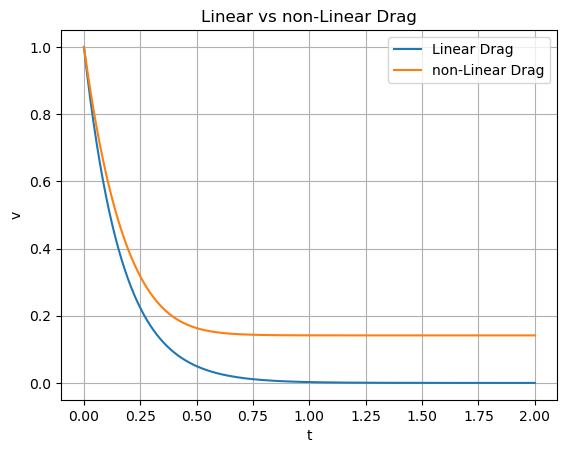

In [122]:

# P3d
pi = 1
mu = 1
r = 1
v_0 = 1
m = 1

eta2 = 0.1
mu2 = 5
v_02 = v_0 - (eta2/mu2)
print(v_02)
ts = np.linspace(0,2,1000)
linear_Drag = v_0*np.e**(-(6*pi*mu*r*ts)/m)
nonLin_drag = np.sqrt(v_02*np.e**(-2*mu2*ts/m)+(eta2/mu2) )
mu2 = 1
nonLin_drag_lin = np.sqrt(v_02*np.e**(-2*mu2*ts/m)+(eta2/mu2) )

plt.plot(ts, linear_Drag, label = "Linear Drag")
plt.plot(ts, nonLin_drag, label = "non-Linear Drag")
#plt.plot(ts, nonLin_drag_lin, label = "non-Linear Drag")
plt.xlabel("t")
plt.ylabel("v")
plt.title("Linear vs non-Linear Drag")
plt.grid(True)
plt.legend()

/var/folders/my/2p0xcfbn4z100hsfx3lhh76m0000gp/T/ipykernel_57869/2227356656.py:14: RuntimeWarning: divide by zero encountered in log
  y_p = -x * np.cos(x)+np.sin(x)*np.log(np.sin(x))
/var/folders/my/2p0xcfbn4z100hsfx3lhh76m0000gp/T/ipykernel_57869/2227356656.py:14: RuntimeWarning: invalid value encountered in multiply
  y_p = -x * np.cos(x)+np.sin(x)*np.log(np.sin(x))


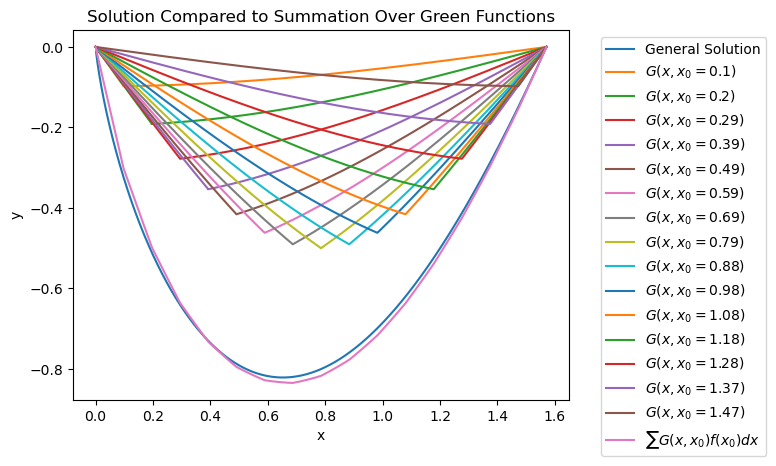

In [49]:
def Greens(x,x_0):
    n= x.shape[0]
    oupt = np.zeros(n)
    dx = (x[-1]-x[0])/n
    indx = int((x_0-x[0])/dx)
    oupt[:indx] = -np.cos(x_0)*np.sin(x[:indx])
    oupt[indx:] = -np.sin(x_0)*np.cos(x[indx:])
    return(oupt)
x_b = 0
x_f = np.pi/2
x = np.linspace(x_b,x_f,1000)
a_1 = 0
a_2 = 0
y_p = -x * np.cos(x)+np.sin(x)*np.log(np.sin(x))
#plt.plot(x,y_p,label = f"Particular Solution")
y_c = a_1*np.cos(x)+a_2*np.sin(x)
#plt.plot(x,y_c,label = f"Complementary Solution")
y_g = y_p+y_c
plt.plot(x,y_g,label = f"General Solution")
N = 15
dx = (x_f-x_b)/(N+1)
n= x.shape[0]
oupt = np.zeros(n)
for i in range(N):
    x_0 = x_b+(i+1)*dx
    y = Greens(x,x_0)
    oupt = oupt+ y/np.sin(x_0)*(x_f-x_b)/(N)
    plt.plot(x,y,label = f"$G(x,x_0={round(x_0,2)})$")
plt.plot(x,oupt,label = f"$\\sum G(x,x_0) f(x_0) dx$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution Compared to Summation Over Green Functions")
plt.show()

/var/folders/my/2p0xcfbn4z100hsfx3lhh76m0000gp/T/ipykernel_57869/2724038909.py:14: RuntimeWarning: divide by zero encountered in log
  y_p =x * np.cos(x)-np.sin(x)*np.log(np.sin(x))
/var/folders/my/2p0xcfbn4z100hsfx3lhh76m0000gp/T/ipykernel_57869/2724038909.py:14: RuntimeWarning: invalid value encountered in log
  y_p =x * np.cos(x)-np.sin(x)*np.log(np.sin(x))
/var/folders/my/2p0xcfbn4z100hsfx3lhh76m0000gp/T/ipykernel_57869/2724038909.py:14: RuntimeWarning: invalid value encountered in multiply
  y_p =x * np.cos(x)-np.sin(x)*np.log(np.sin(x))


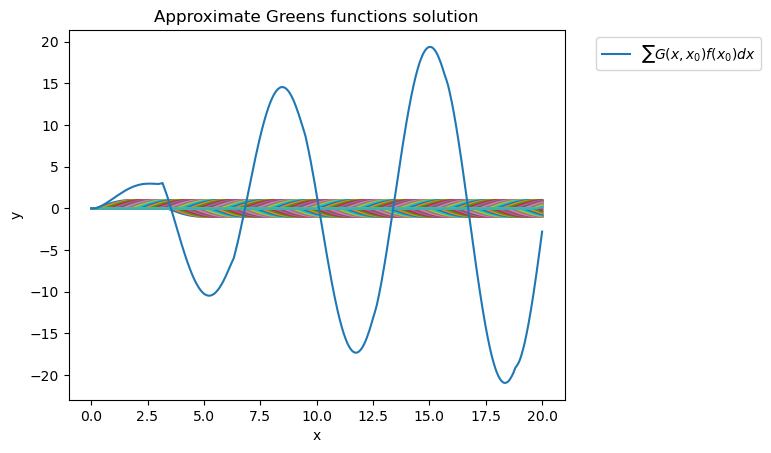

In [118]:
def Greens(x,x_0):
    n= x.shape[0]
    oupt = np.zeros(n)
    dx = (x[-1]-x[0])/n
    indx = int((x_0-x[0])/dx)
    oupt[:indx] = 0
    oupt[indx:] = np.cos(x_0)*np.sin(x[indx:])-np.sin(x_0)*np.cos(x[indx:])
    return(oupt)
x_b = 0
x_f = 20
x = np.linspace(x_b,x_f,1000)
a_1 = 0
a_2 = 0
y_p =x * np.cos(x)-np.sin(x)*np.log(np.sin(x))
#plt.plot(x,y_p,label = f"Particular Solution")
y_c = a_1*np.cos(x)+a_2*np.sin(x)
#plt.plot(x,y_c,label = f"Complementary Solution")
y_g = y_p+y_c
#plt.plot(x,y_g,label = f"General Solution")
#====================


N = 100
dx = (x_f-x_b)/(N+1)
n= x.shape[0]
oupt = np.zeros(n)
for i in range(N):
    x_0 = x_b+(i+1)*dx
    y = Greens(x,x_0)
    oupt = oupt+ y/np.sin(x_0)*(x_f-x_b)/(N)
    #plt.plot(x,y,label = f"$G(x,x_0={round(x_0,2)})$")
    plt.plot(x,y)
plt.plot(x,oupt,label = f"$\\sum G(x,x_0) f(x_0) dx$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Approximate Greens functions solution")
plt.show()

/var/folders/my/2p0xcfbn4z100hsfx3lhh76m0000gp/T/ipykernel_57869/3970862869.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  y = np.trapz(G(x,s) * f, s, axis=1)


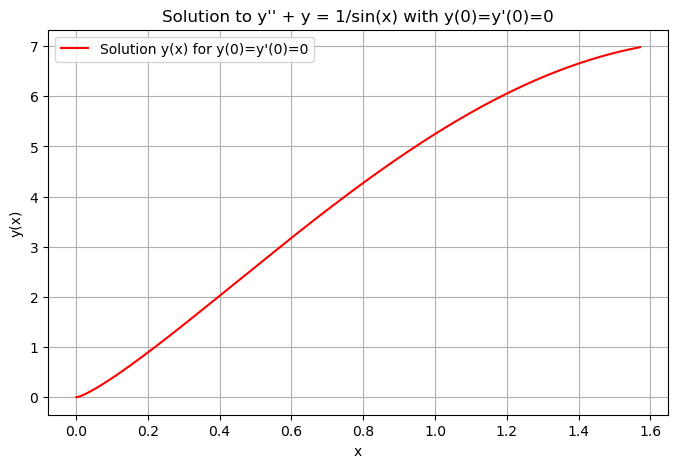

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Domain, avoid singularity at x=0
x = np.linspace(1e-3, np.pi/2, 1000)
s = np.linspace(1e-3, np.pi/2, 1000)

# Green's function
def G(x, s):
    X, S = np.meshgrid(x, s, indexing='ij')
    return np.where(X >= S, np.sin(X - S), 0)

# RHS f(s) = 1/sin(s)
f = 1 / s

# Compute y(x) = ∫ G(x,s) f(s) ds numerically
y = np.trapz(G(x,s) * f, s, axis=1)

plt.plot(x, y, 'r', label="Solution y(x) for y(0)=y'(0)=0")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Solution to y'' + y = 1/sin(x) with y(0)=y'(0)=0")
plt.grid(True)
plt.legend()
plt.show()
